<h3>percentile method to handle outliers</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("height.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
df.shape

(10000, 3)

In [4]:
df["Height"].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

<Axes: xlabel='Height', ylabel='Count'>

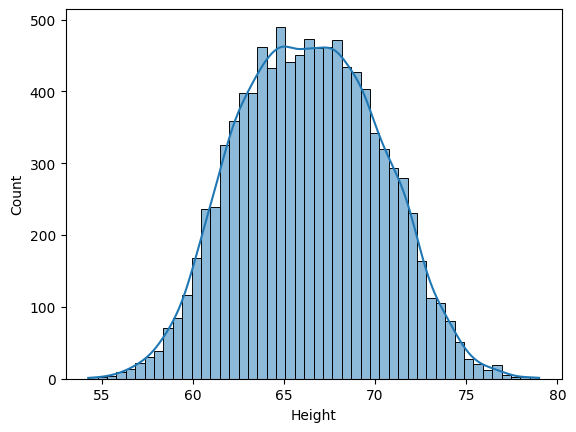

In [6]:
sns.histplot(df["Height"],kde=True)

<Axes: >

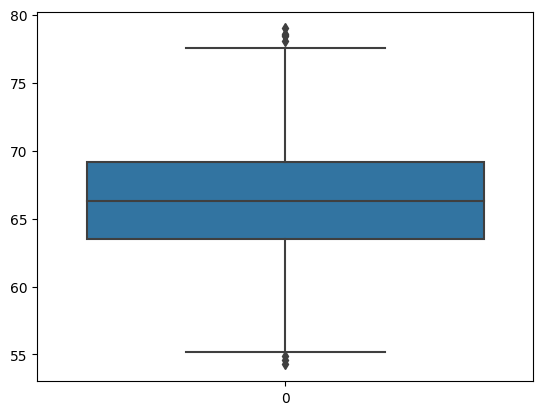

In [7]:
sns.boxplot(df["Height"])

In [8]:
upper_limit = df["Height"].quantile(0.99)
lower_limit = df["Height"].quantile(0.01)
upper_limit,lower_limit

(74.7857900583366, 58.13441158671655)

In [10]:
new_df = df[(df["Height"]<upper_limit) & (df["Height"]>lower_limit)]
new_df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


<Axes: >

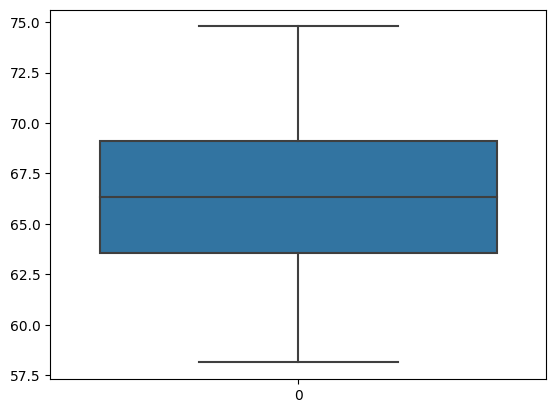

In [13]:
sns.boxplot(new_df["Height"])

<h3>Winsorization</h3>

In [15]:
#capping
new_df1 = pd.DataFrame(df,columns=df.columns)
new_df1

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [16]:
new_df1["Height"]=np.where(new_df1["Height"]>upper_limit,upper_limit,np.where(new_df1["Height"]<lower_limit,lower_limit,new_df1["Height"]))


<Axes: >

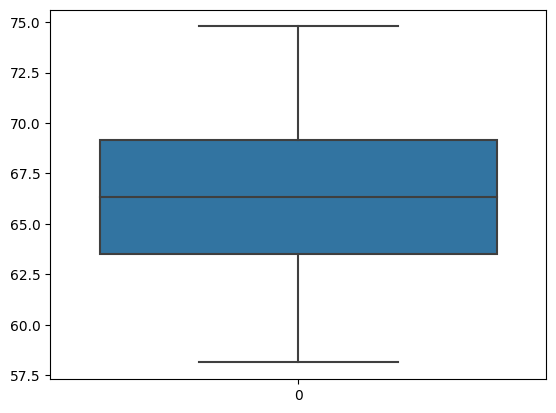

In [17]:
sns.boxplot(new_df1["Height"])